In [1]:
import pandas as pd
import numpy as np

In [2]:
df_diab = pd.read_csv('diabetes.csv')

In [3]:
df_diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df_diab.shape

(768, 9)

In [5]:
df_diab.Outcome.unique()

array([1, 0])

In [6]:
df_diab.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
X = df_diab.drop(['Outcome'],axis=1)
y = df_diab['Outcome']

In [8]:
np.random.seed(12345)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train,y_test = train_test_split(X,
                                                   y,
                                                   stratify = y,
                                                   test_size=0.2,
                                                   random_state=12345)

In [11]:
X_train.shape

(614, 8)

In [12]:
X_test.shape

(154, 8)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
# X-scaled = (X - mean)/sd -> z value

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
import tensorflow as tf

In [16]:
print(tf.__version__)

2.8.0


In [17]:
from tensorflow.keras.models import Sequential

In [18]:
from tensorflow.keras.layers import Dense, Input

In [19]:
model = Sequential()

In [20]:
X_train_scaled.shape[1]

8

In [21]:
model.add(Input(shape = (X_train_scaled.shape[1],))) # Input Layer

In [22]:
# First Hidden Layer - 128 neurons, Relu activation
model.add(Dense(units=128,
                activation='relu'
         ))

In [23]:
# Second Hidden Layer - 64 neurons, Relu activation
model.add(Dense(units=64, activation='relu'))

# Third Hidden Layer 32, relu activation
model.add(Dense(units=32, activation='relu'))

In [24]:
# Output layer - Sigmoid
model.add(Dense(units=1, activation='sigmoid'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
_________________________________________________________________


In [28]:
#(8+1)*128
#(128+1)*64
(64+1)*32

2080

In [29]:
(1152+8256+2080+33)

11521

In [30]:
model.compile(optimizer='adam', # Variant of Gradient Descent
              loss= 'binary_crossentropy', # Log Loss or Binary Cross Entropy
              metrics=['accuracy']) # Monitor Accuracy

In [31]:
result = model.fit(X_train_scaled, 
                   y_train,
                   validation_data = (X_test_scaled, y_test),
                   epochs=100)

Epoch 1/100
20/20 [==============================] - 1s 21ms/step - loss: 0.6432 - accuracy: 0.6287 - val_loss: 0.5601 - val_accuracy: 0.7338
Epoch 2/100
20/20 [==============================] - 0s 6ms/step - loss: 0.5267 - accuracy: 0.7524 - val_loss: 0.4793 - val_accuracy: 0.7922
Epoch 3/100
20/20 [==============================] - 0s 6ms/step - loss: 0.4839 - accuracy: 0.7720 - val_loss: 0.4509 - val_accuracy: 0.7727
Epoch 4/100
20/20 [==============================] - 0s 7ms/step - loss: 0.4632 - accuracy: 0.7818 - val_loss: 0.4337 - val_accuracy: 0.7987
Epoch 5/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4501 - accuracy: 0.7899 - val_loss: 0.4384 - val_accuracy: 0.8052
Epoch 6/100
20/20 [==============================] - 0s 6ms/step - loss: 0.4450 - accuracy: 0.7834 - val_loss: 0.4282 - val_accuracy: 0.7857
Epoch 7/100
20/20 [==============================] - 0s 10ms/step - loss: 0.4363 - accuracy: 0.7932 - val_loss: 0.4255 - val_accuracy: 0.7857
Epoch 8/100

In [32]:
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

In [33]:
y_train_pred[0] >=0.5

array([ True])

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [35]:
confusion_matrix(y_pred=y_train_pred >= 0.5, 
                 y_true = y_train)

array([[400,   0],
       [  0, 214]])

In [36]:
accuracy_score(y_pred=y_train_pred >= 0.5, 
               y_true = y_train)

1.0

In [37]:
confusion_matrix(y_pred=y_test_pred >= 0.5, 
                 y_true = y_test)

array([[81, 19],
       [18, 36]])

In [38]:
accuracy_score(y_pred=y_test_pred >= 0.5, 
               y_true = y_test)

0.7597402597402597

In [39]:
history = pd.DataFrame(result.history)

In [40]:
history.head()

,loss,accuracy,val_loss,val_accuracy
0,0.643217,0.628664,0.560087,0.733766
1,0.526666,0.752443,0.479271,0.792208
2,0.483865,0.771987,0.450894,0.772727
3,0.463191,0.781759,0.433671,0.798701
4,0.450145,0.789902,0.438443,0.805195


In [41]:
import matplotlib.pyplot as plt

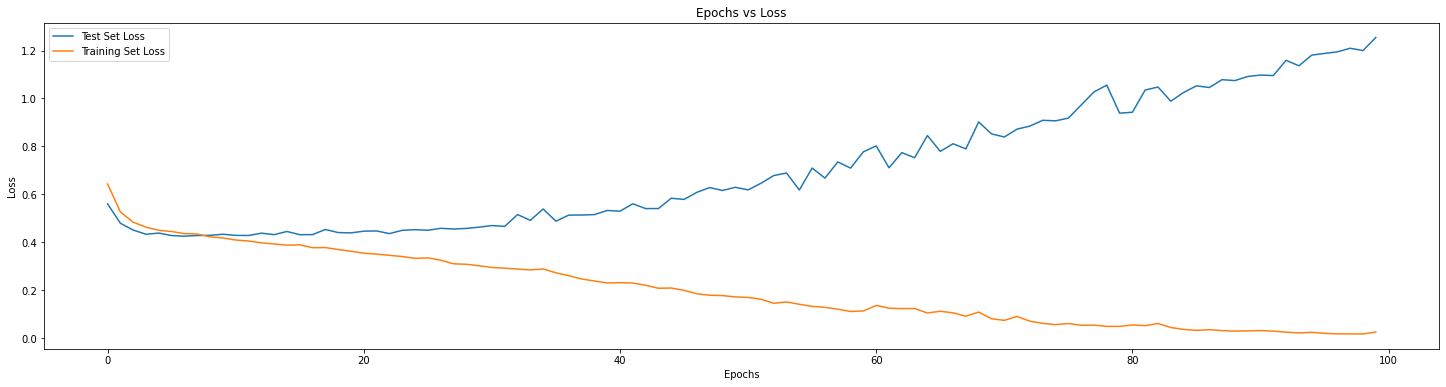

In [42]:
plt.figure(figsize = (25,6))
plt.plot(history.val_loss, label='Test Set Loss')
plt.plot(history.loss, label='Training Set Loss')
plt.title('Epochs vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

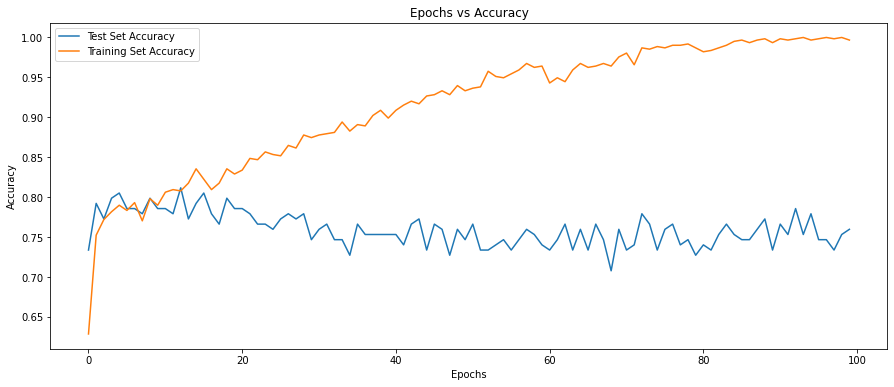

In [43]:
plt.figure(figsize = (15,6))
plt.plot(history.val_accuracy, label='Test Set Accuracy')
plt.plot(history.accuracy, label='Training Set Accuracy')
plt.title('Epochs vs Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Implement Early Stopping

In [74]:
from tensorflow.keras.callbacks import EarlyStopping

In [75]:
tf.random.set_seed(12345)

In [76]:
model_es = Sequential()

In [77]:
model_es.add(Input(shape = (X_train_scaled.shape[1],)))

In [78]:
model_es.add(Dense(units = 128, activation='relu'))

In [79]:
model_es.add(Dense(units = 64, activation = 'relu'))

In [80]:
model_es.add(Dense(units = 32, activation = 'relu'))

In [81]:
model_es.add(Dense(units = 1, activation = 'sigmoid'))

In [82]:
model_es.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               1152      
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
_________________________________________________________________


In [83]:
model_es.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics = 'accuracy')

In [84]:
es = EarlyStopping(monitor='val_accuracy',
                   patience = 4)

In [85]:
result_es = model_es.fit(X_train_scaled,
                         y_train,
                         validation_data = (X_test_scaled, y_test),
                         epochs = 100,
                         callbacks=[es]
                        )

Epoch 1/100
20/20 [==============================] - 1s 8ms/step - loss: 0.5866 - accuracy: 0.6954 - val_loss: 0.5023 - val_accuracy: 0.7468
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4881 - accuracy: 0.7638 - val_loss: 0.4486 - val_accuracy: 0.7792
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4638 - accuracy: 0.7883 - val_loss: 0.4322 - val_accuracy: 0.7922
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4540 - accuracy: 0.7818 - val_loss: 0.4403 - val_accuracy: 0.7922
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4432 - accuracy: 0.7932 - val_loss: 0.4364 - val_accuracy: 0.7792
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4410 - accuracy: 0.7899 - val_loss: 0.4399 - val_accuracy: 0.7597
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4328 - accuracy: 0.7980 - val_loss: 0.4297 - val_accuracy: 0.7922


In [86]:
history_es = pd.DataFrame(result_es.history)

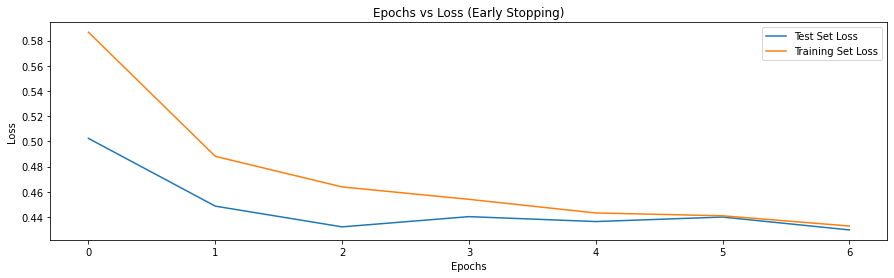

In [87]:
plt.figure(figsize = (15,4))
plt.plot(history_es.val_loss, label='Test Set Loss')
plt.plot(history_es.loss, label='Training Set Loss')
plt.title('Epochs vs Loss (Early Stopping)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

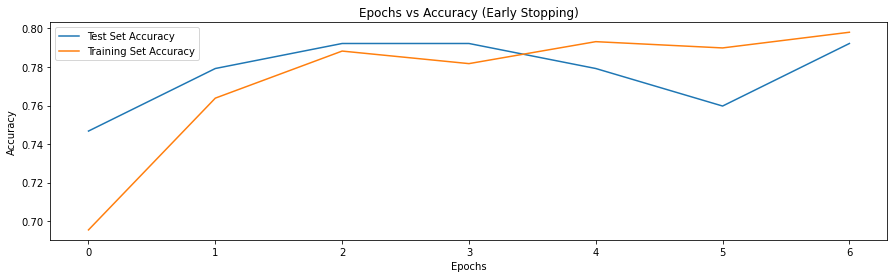

In [88]:
plt.figure(figsize = (15,4))
plt.plot(history_es.val_accuracy, label='Test Set Accuracy')
plt.plot(history_es.accuracy, label='Training Set Accuracy')
plt.title('Epochs vs Accuracy (Early Stopping)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Implementing L1 Regularization

In [45]:
tf.random.set_seed(12345)

In [46]:
model_reg = Sequential()

In [47]:
model_reg.add(Input(shape = (X_train_scaled.shape[1],)))

In [48]:
# First Hidden Layer - 128 neurons, Relu activation, L1 Regularizer for the Kernel
model_reg.add(Dense(units=128,
                    activation='relu',
                    kernel_regularizer = tf.keras.regularizers.L1()
                   )
             )

In [49]:
# Second Hidden Layer - 64 neurons, Relu activation
model_reg.add(Dense(units=64, activation='relu'))

In [50]:
# Third Hidden Layer 32, relu
model_reg.add(Dense(units=32, activation='relu'))

In [51]:
# Output layer - Sigmoid
model_reg.add(Dense(units=1, activation='sigmoid'))

In [52]:
model_reg.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               1152      
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
_________________________________________________________________


In [53]:
model_reg.compile(optimizer = 'adam',
                  loss = 'binary_crossentropy',
                  metrics = 'accuracy')

In [54]:
model_reg.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               1152      
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
_________________________________________________________________


In [55]:
result_reg = model_reg.fit(X_train_scaled, 
                           y_train,
                           validation_data = (X_test_scaled, y_test),
                           epochs=100)

Epoch 1/100
20/20 [==============================] - 1s 9ms/step - loss: 1.5808 - accuracy: 0.6857 - val_loss: 1.4197 - val_accuracy: 0.7468
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 1.3391 - accuracy: 0.7606 - val_loss: 1.2281 - val_accuracy: 0.7857
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 1.1797 - accuracy: 0.7769 - val_loss: 1.0824 - val_accuracy: 0.7792
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 1.0560 - accuracy: 0.7769 - val_loss: 0.9801 - val_accuracy: 0.7727
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.9510 - accuracy: 0.7899 - val_loss: 0.8859 - val_accuracy: 0.7857
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.8677 - accuracy: 0.7883 - val_loss: 0.8097 - val_accuracy: 0.7727
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.7939 - accuracy: 0.7850 - val_loss: 0.7352 - val_accuracy: 0.7857
Epoch 8/100
2

In [56]:
history_reg = pd.DataFrame(result_reg.history)

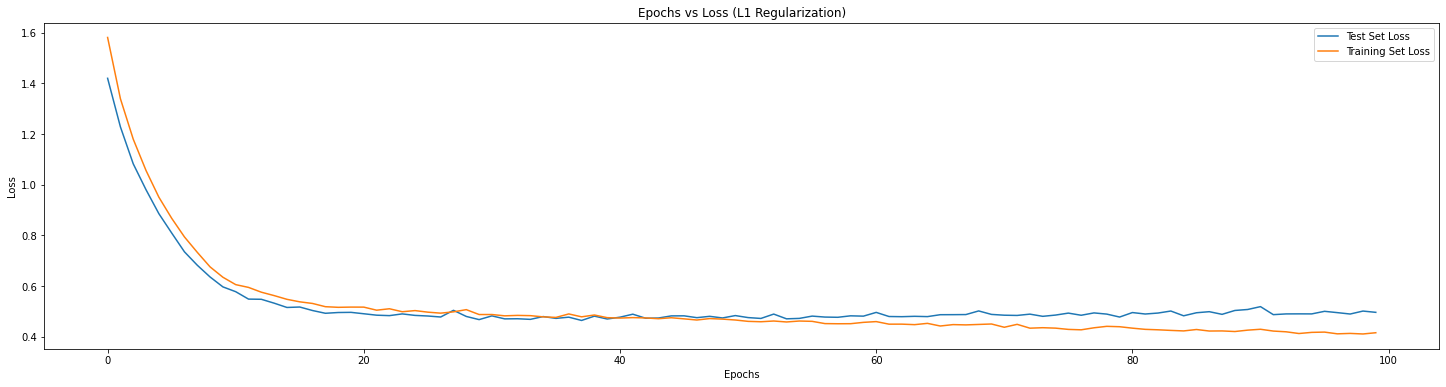

In [57]:
plt.figure(figsize = (25,6))
plt.plot(history_reg.val_loss, label='Test Set Loss')
plt.plot(history_reg.loss, label='Training Set Loss')
plt.title('Epochs vs Loss (L1 Regularization)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Implement Dropout Regularization

In [58]:
from tensorflow.keras.layers import Dropout

In [59]:
model_drp = Sequential()

In [60]:
model_drp.add(Input(shape = (X_train_scaled.shape[1],)))

In [61]:
model_drp.add(Dense(units=128,
                    activation='relu'
                   )
             )

In [62]:
model_drp.add(Dropout(0.4))

In [63]:
model_drp.add(Dense(units=64, activation='relu'))

In [64]:
model_drp.add(Dropout(0.3))

In [65]:
model_drp.add(Dense(units=32, activation='relu'))

In [66]:
model_drp.add(Dropout(0.25))

In [67]:
model_drp.add(Dense(units=1, activation='sigmoid'))

In [68]:
model_drp.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               1152      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                

In [69]:
model_drp.compile(optimizer = 'adam',
                  loss = 'binary_crossentropy',
                  metrics = 'accuracy')

In [70]:
result_drp = model_drp.fit(X_train_scaled, 
                           y_train,
                           validation_data = (X_test_scaled, y_test),
                           epochs=100)

Epoch 1/100
20/20 [==============================] - 1s 8ms/step - loss: 0.6921 - accuracy: 0.5375 - val_loss: 0.6261 - val_accuracy: 0.7597
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6258 - accuracy: 0.6971 - val_loss: 0.5716 - val_accuracy: 0.7662
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5730 - accuracy: 0.7313 - val_loss: 0.5073 - val_accuracy: 0.7662
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5354 - accuracy: 0.7492 - val_loss: 0.4747 - val_accuracy: 0.7727
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5184 - accuracy: 0.7671 - val_loss: 0.4577 - val_accuracy: 0.7727
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5006 - accuracy: 0.7720 - val_loss: 0.4509 - val_accuracy: 0.7792
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4962 - accuracy: 0.7492 - val_loss: 0.4456 - val_accuracy: 0.7727
Epoch 8/100
2

In [71]:
history_drp = pd.DataFrame(result_drp.history)

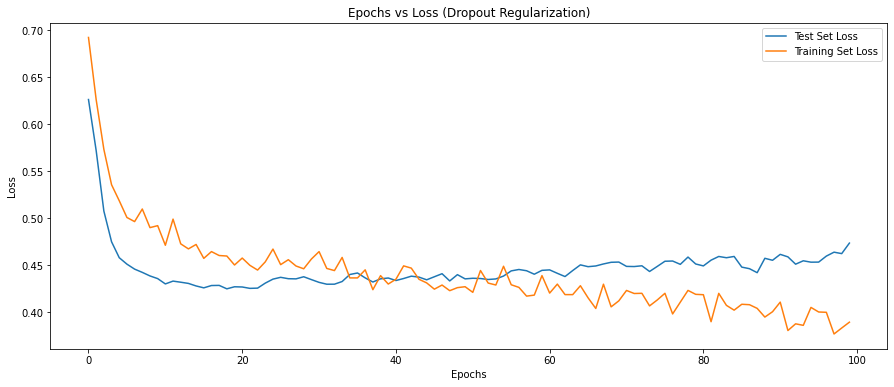

In [72]:
plt.figure(figsize = (15,6))
plt.plot(history_drp.val_loss, label='Test Set Loss')
plt.plot(history_drp.loss, label='Training Set Loss')
plt.title('Epochs vs Loss (Dropout Regularization)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

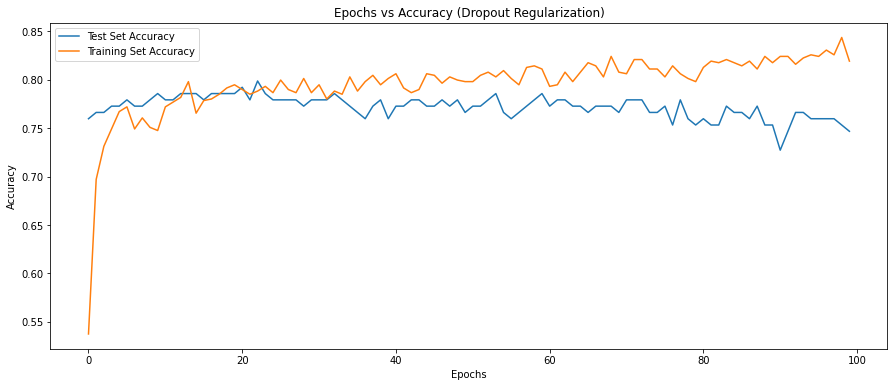

In [73]:
plt.figure(figsize = (15,6))
plt.plot(history_drp.val_accuracy, label='Test Set Accuracy')
plt.plot(history_drp.accuracy, label='Training Set Accuracy')
plt.title('Epochs vs Accuracy (Dropout Regularization)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()